In [1]:
# import Libraries
import pandas as pd 
import numpy as np 
import sys
import os

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from Load_data import CSVDataloader, get_file_path
from eda import EDA


In [2]:
# Load data
da = get_file_path("csvpath")
df = CSVDataloader(da).load_data()

c:\Users\Specter\Documents\Tenx_Academy\Week-6\Intelligent-Complaint-Analysis\scripts\Load_data.py:22: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(self.file_path)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [6]:
# identifying missing values
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

In [7]:
df.describe()

,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


In [6]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9609792    False
9609793    False
9609794    False
9609795    False
9609796    False
Length: 9609797, dtype: bool

# Exploratory Data Analysis and Data Pre-processing

In [3]:
eda = EDA(df)

c:\Users\Specter\Documents\Tenx_Academy\Week-6\Intelligent-Complaint-Analysis\src\eda.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x='Count', y=column_name, palette="viridis", legend=False)


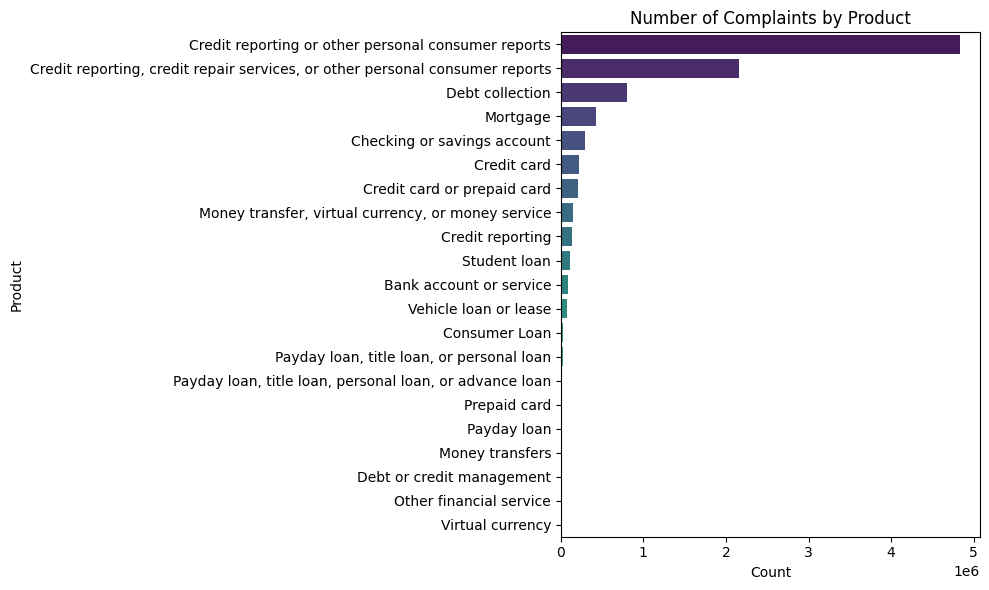

,Product,Count
0,Credit reporting or other personal consumer re...,4834855
1,"Credit reporting, credit repair services, or o...",2163857
2,Debt collection,799197
3,Mortgage,422254
4,Checking or savings account,291178
5,Credit card,226686
6,Credit card or prepaid card,206369
7,"Money transfer, virtual currency, or money ser...",145066
8,Credit reporting,140429
9,Student loan,109717


In [9]:
eda.complaints_by_column('Product')

c:\Users\Specter\Documents\Tenx_Academy\Week-6\Intelligent-Complaint-Analysis\src\eda.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts, x='Count', y=column_name, palette="viridis", legend=False)


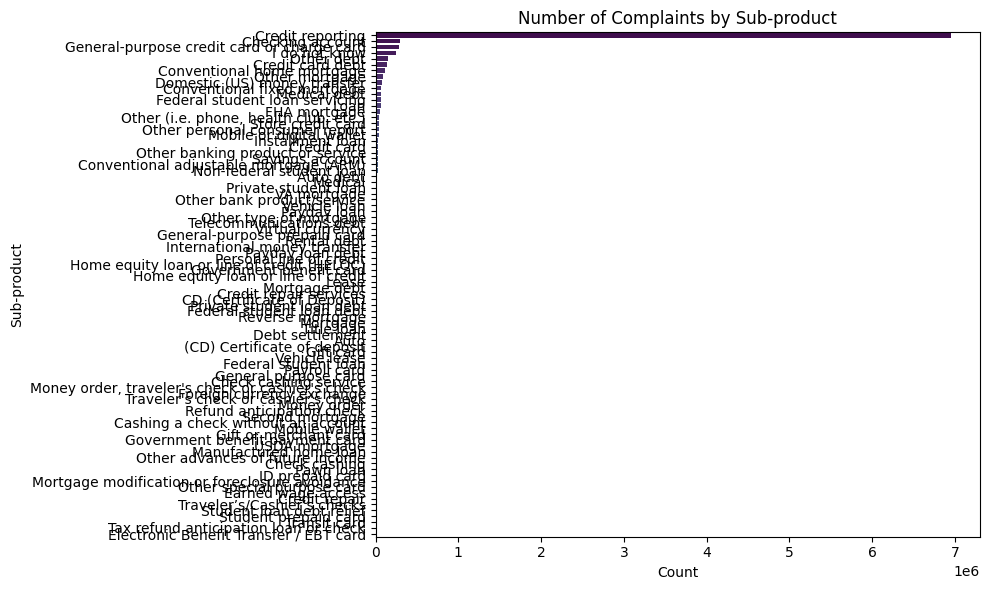

,Sub-product,Count
0,Credit reporting,6955847
1,Checking account,293297
2,General-purpose credit card or charge card,281931
3,I do not know,248891
4,Other debt,147439
...,...,...
81,Student loan debt relief,67
82,Student prepaid card,52
83,Transit card,37
84,Tax refund anticipation loan or check,25


In [10]:
eda.complaints_by_column('Sub-product')

### Calculate and visualize the length (word count) of the Consumer complaint narrative.

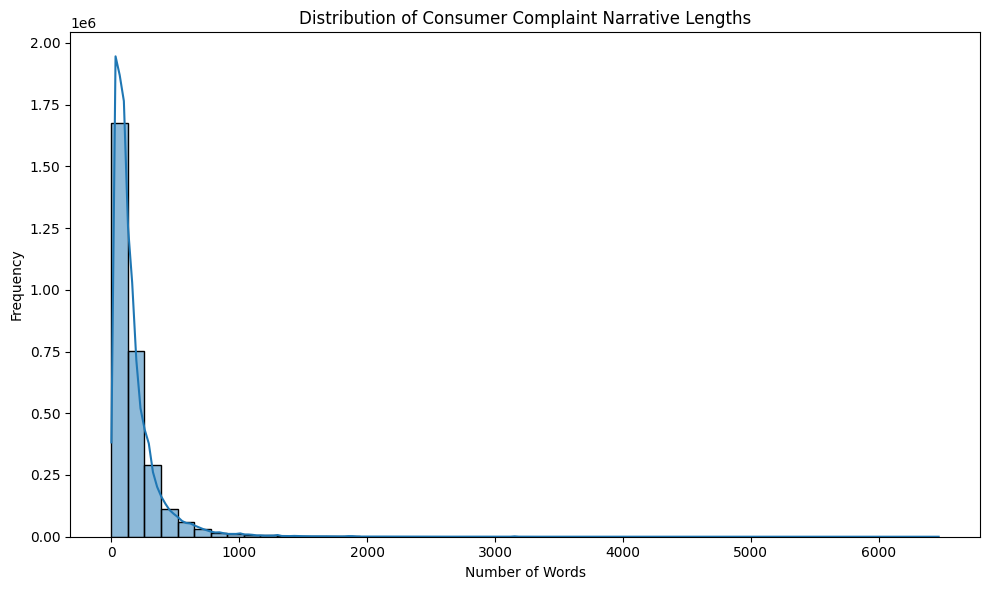

count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: narrative_length, dtype: float64

In [6]:
eda.narrative_length_distribution()

In [8]:
eda.count_narrative_presence()

{'With Narrative': np.int64(2980756), 'Without Narrative': np.int64(6629041)}

In [4]:
 # Filter the dataset to meet the project's requirements
cleaned_df = eda.clean_consumer_narratives()

In [5]:
cleaned_df[['Consumer complaint narrative', 'cleaned_narrative']].head()

,Consumer complaint narrative,cleaned_narrative
0,NaN,
1,NaN,
2,NaN,
3,NaN,
4,NaN,


In [7]:
df1 = eda.filter_complaints()

In [8]:
# Save the cleaned and filtered dataset 
df1.to_csv("../data/cleaned_complaints.csv", index=False)  

In [9]:
df1 = pd.read_csv("../data/cleaned_complaints.csv")

In [10]:
df1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,cleaned_narrative
0,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,xxxx xxxx card opened name fraudster received ...
1,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,NaN,Consent provided,Web,2025-06-13,Closed with explanation,Yes,NaN,14061897,made mistake using wellsfargo debit card depsi...
2,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,dear cfpb secured credit card citibank changed...
3,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,citi reward card credit balance issued recentl...
4,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,b writing dispute following charge citi credit...


In [12]:
df1.shape

(222483, 19)

In [11]:
df1.isna().sum()

Date received                        0
Product                              0
Sub-product                      18872
Issue                                0
Sub-issue                        20485
Consumer complaint narrative         0
Company public response         109841
Company                              0
State                             1386
ZIP code                             0
Tags                            180788
Consumer consent provided?           0
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              202149
Complaint ID                         0
cleaned_narrative                    0
dtype: int64